In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("tips.csv")

In [3]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
df.shape

(244, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
cat_cols = df.select_dtypes(include='object').columns

In [10]:
for col in cat_cols:
    print('-'*40)
    print(f"Column: {df[col].value_counts()}")
    print(f"unique: {df[col].unique()}")
    

----------------------------------------
Column: sex
Male      157
Female     87
Name: count, dtype: int64
unique: ['Female' 'Male']
----------------------------------------
Column: smoker
No     151
Yes     93
Name: count, dtype: int64
unique: ['No' 'Yes']
----------------------------------------
Column: day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
unique: ['Sun' 'Sat' 'Thur' 'Fri']
----------------------------------------
Column: time
Dinner    176
Lunch      68
Name: count, dtype: int64
unique: ['Dinner' 'Lunch']


In [11]:
df[cat_cols].head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [12]:
num_col = df.select_dtypes(exclude='object').columns
df[num_col].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [13]:
corr_matrix = df[num_col].corr()
print(corr_matrix)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: xlabel='sex', ylabel='count'>

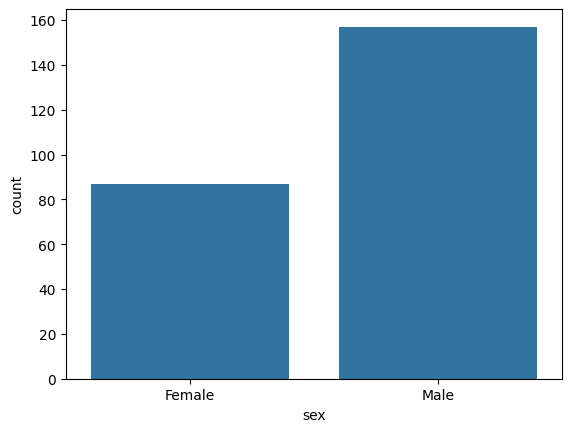

In [14]:
sns.countplot(x='sex', data=df)


<Axes: xlabel='smoker', ylabel='count'>

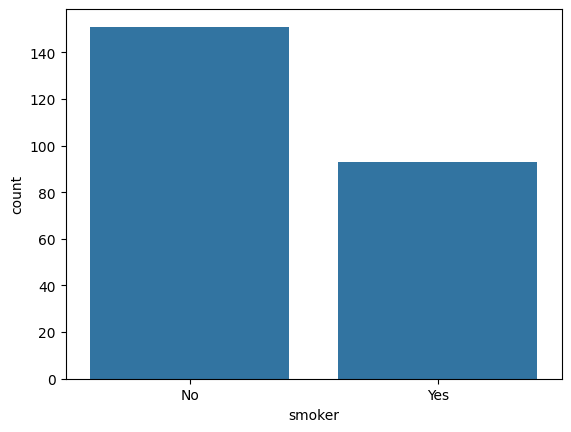

In [15]:
sns.countplot(x='smoker',data=df)

<Axes: xlabel='day', ylabel='count'>

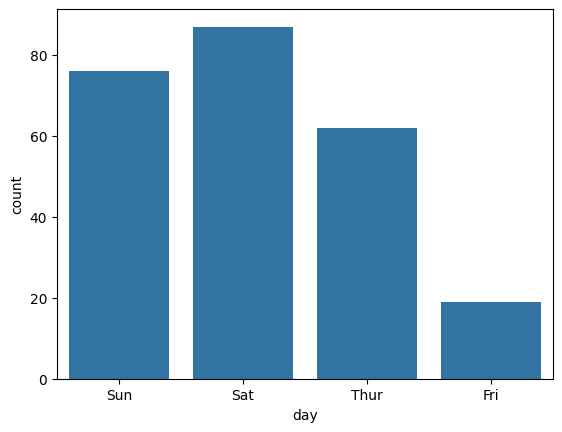

In [16]:
sns.countplot(x='day',data=df)

In [17]:
def avg_tip_per(qt):
    avg_tip_val = df.groupby(qt)['tip'].mean()
    x = avg_tip_val.index
    y = avg_tip_val.values
    plt.bar(x, y)
    # plt.yticks(np.arange(0.0, 3.8, 0.2))
    plt.title(f'Average tip Per {qt}')
    plt.xlabel(f'{qt}')
    plt.ylabel('avg tip')
    plt.show()

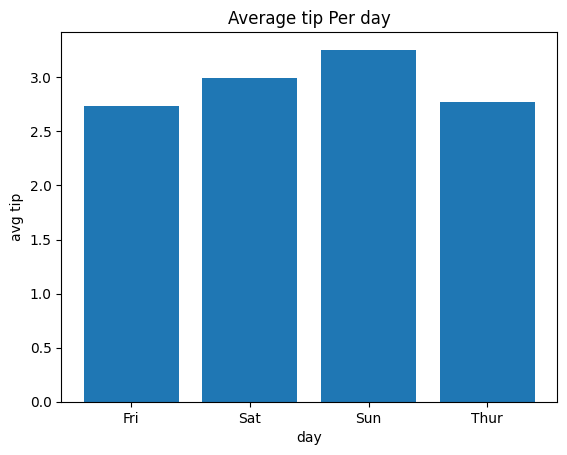

In [18]:
avg_tip_per('day')

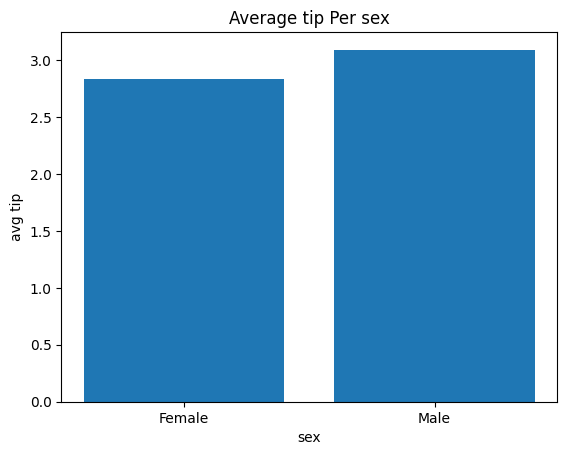

In [19]:
avg_tip_per('sex')

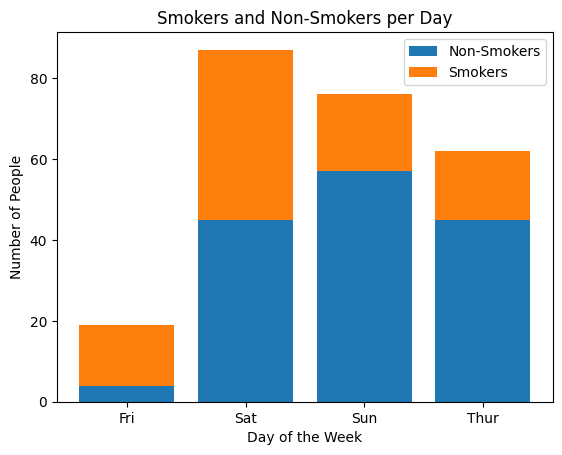

In [20]:
counts = df.groupby(['day', 'smoker']).size().unstack(fill_value=0)
days = counts.index

plt.bar(days, counts['No'], label='Non-Smokers')
plt.bar(days, counts['Yes'], bottom=counts['No'], label='Smokers')

plt.title('Smokers and Non-Smokers per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.legend()

plt.show()


<Axes: xlabel='sex', ylabel='tip'>

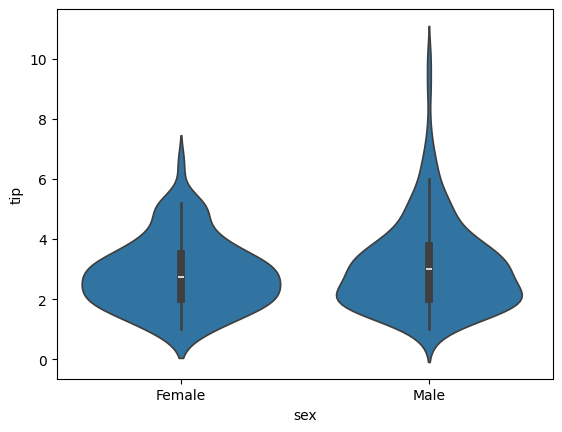

In [21]:
sns.violinplot(x='sex', y='tip', data=df)

### Which gender tips more on average?
#### ANS = Male

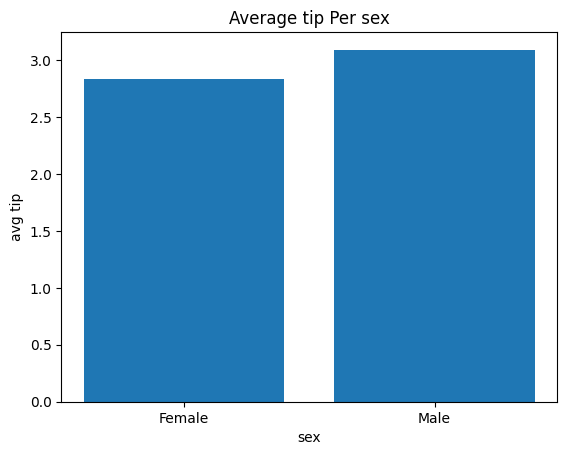

In [22]:
avg_tip_per('sex')

### Which day has the highest number of customers?
#### ANS = Saturday

<Axes: xlabel='day', ylabel='count'>

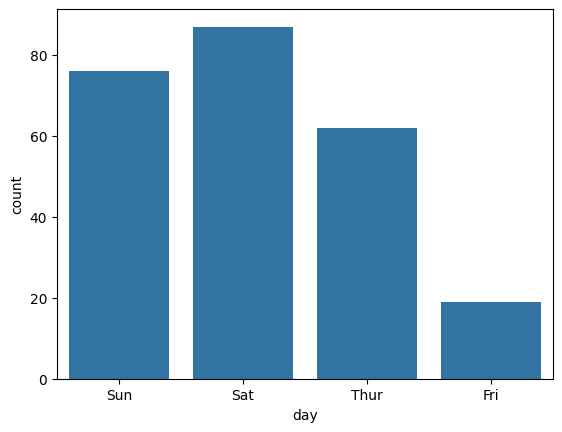

In [23]:
sns.countplot(x='day',data=df)

### Are there more smokers or non-smokers visiting the restaurant?
#### ANS = Non Smoker

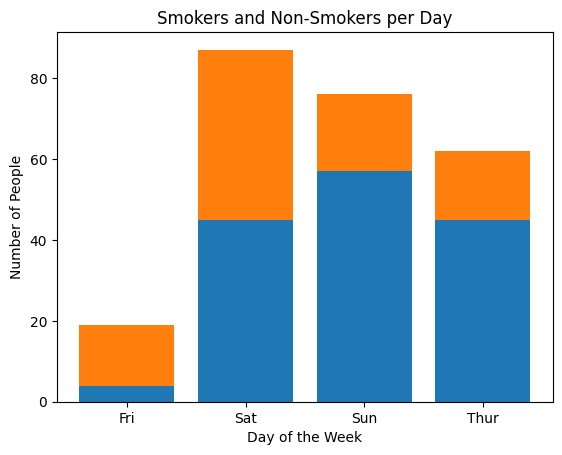

In [24]:
counts = df.groupby(['day', 'smoker']).size().unstack(fill_value=0)
days = counts.index
plt.bar(days, counts['No'], label='Non-Smokers')
plt.bar(days, counts['Yes'], bottom=counts['No'], label='Smokers')

plt.title('Smokers and Non-Smokers per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

### Are there any patterns between day and smoker status?
ANS - YES, Start of the weekend, i.e. Firday and Saturday there are more smokers. Though Verrrrrrrry Little Data to say for sure

In [25]:
counts

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


### Are there any outliers in tip for different genders? 
#### ANS = Again, YES!! Men trying to impress women

<Axes: xlabel='sex', ylabel='tip'>

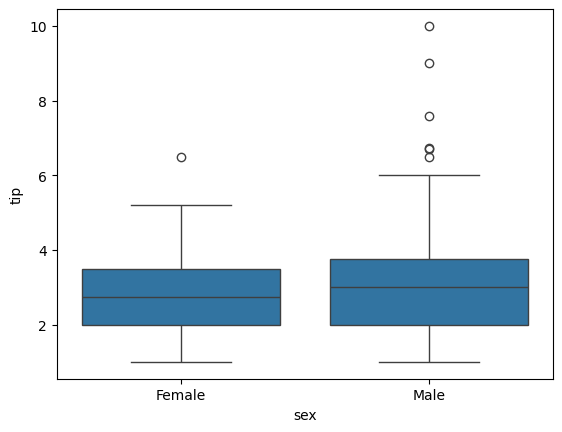

In [26]:
sns.boxplot(x='sex', y='tip', data=df)

### How does the party size vary across days?
#### ANS = Sunday's People Just have a lot of freeee time.

<Axes: xlabel='day', ylabel='size'>

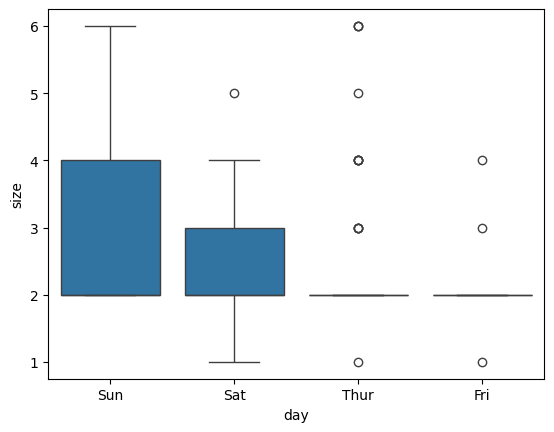

In [27]:
sns.boxplot(x='day', y='size', data=df)